<a href="https://colab.research.google.com/github/ImAbhijeetPanda/Stock-Price-Prediction-for-Yes-Bank/blob/main/Stock_Price_Prediction_for_Yes_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Stock Price Prediction for Yes Bank



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name  -** Abhijeet Panda

# **Project Summary -**

Project Title: Stock Price Prediction for Yes Bank Using Regression Models

Objective:
The main objective of this project is to predict the monthly closing stock price of Yes Bank using machine learning regression models. Accurate prediction can assist investors and stakeholders in making informed financial decisions.

Business Context:
Yes Bank, a major player in the Indian financial sector, faced a major financial fraud case in 2018 involving its CEO, Rana Kapoor. This incident led to drastic fluctuations in its stock prices. Through this project, we aim to explore how well machine learning models can predict stock prices during volatile periods.

Dataset Overview:
The dataset includes monthly stock price data since the bank's inception. Key features are:
- Date (month and year)
- Open price
- High price
- Low price
- Close price (target variable)

Project Approach:
- Data exploration and cleaning to ensure data quality.
- Exploratory Data Analysis (EDA) to identify patterns and trends.
- Feature engineering if necessary (e.g., adding year, month, lag features).
- Building regression models like Linear Regression, Decision Tree Regressor, and Random Forest Regressor.
- Evaluating models using MAE, RMSE, and R² score.

Expected Outcome:
Develop a robust predictive model capable of forecasting Yes Bank’s closing stock prices with good accuracy and derive meaningful insights from the financial data.

# **GitHub Link -**


https://github.com/ImAbhijeetPanda/Stock-Price-Prediction-for-Yes-Bank/tree/main

# **Problem Statement**


**To develop a regression model that accurately predicts the monthly closing stock price of Yes Bank based on historical stock data.**

# **General Guidelines** : -  

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Statsmodels for Time Series Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Scikit-learn for Machine Learning and Preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Visualization Libraries
import plotly.graph_objects as go

# Other settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", palette="husl")

### Dataset Loading

In [2]:
# Load Dataset

data = pd.read_csv("data_YesBank_StockPrices.csv")

### Dataset First View

In [3]:
# Dataset First Look
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


#### Duplicate Values

In [7]:
# Count the number of duplicate rows in the dataset
data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


### What did you know about your dataset?


- The dataset contains **185 rows** and **5 columns**.
- There are **no missing values** in any of the columns.
- There are **no duplicate records** in the dataset.
- The features present in the dataset are:
    - **'Date'**: Represents the month and year (data type: object/string).
    - **'Open'**: Opening stock price for the month (data type: float64).
    - **'High'**: Highest stock price for the month (data type: float64).
    - **'Low'**: Lowest stock price for the month (data type: float64).
    - **'Close'**: Closing stock price for the month (data type: float64).
- Key statistics for the 'Close' column:
    - **Minimum closing price**: ~9.98
    - **Maximum closing price**: ~367.9
    - **Mean closing price**: ~105.2
- The dataset appears to be clean and ready for further preprocessing and analysis.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1. **Date**  
    - **Description**: Date of record in Month-Year format.  
    - **Data Type**: Object (String).  

2. **Open**  
    - **Description**: Opening stock price of the month.  
    - **Data Type**: Float64.  

3. **High**  
    - **Description**: Highest stock price reached during the month.  
    - **Data Type**: Float64.  

4. **Low**  
    - **Description**: Lowest stock price reached during the month.  
    - **Data Type**: Float64.  

5. **Close**  
    - **Description**: Closing stock price of the month (Target variable for prediction).  
    - **Data Type**: Float64.  

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
data.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
df = data.copy()

In [13]:
# Write your code to make your dataset analysis ready.
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y').dt.strftime('%Y-%m-%d')

In [14]:
df.set_index('Date', inplace=True)

In [15]:
df.tail()

,Open,High,Low,Close
Date,,,,
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15
2020-10-01,13.30,14.01,12.11,12.42
2020-11-01,12.41,14.90,12.21,14.67


### What all manipulations have you done and insights you found?



The following manipulations have been done on the dataset:

1. **Copied the Original Dataset**:
    - The `data` DataFrame was copied to a new DataFrame named `df` using the `copy()` method. This ensures that any changes made to `df` do not affect the original `data` DataFrame.

    ```python
    df = data.copy()
    ```

2. **Converted the 'Date' Column to a Standard Format**:
    - The 'Date' column in the `df` DataFrame was originally in the format `MMM-YY` (e.g., "Jul-05").
    - It was converted to a standard date format (`YYYY-MM-DD`) using the `pd.to_datetime()` function and then formatted using `.dt.strftime('%Y-%m-%d')`.

These manipulations ensure that the dataset is ready for further analysis and visualization, with a standardized date format for easier handling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

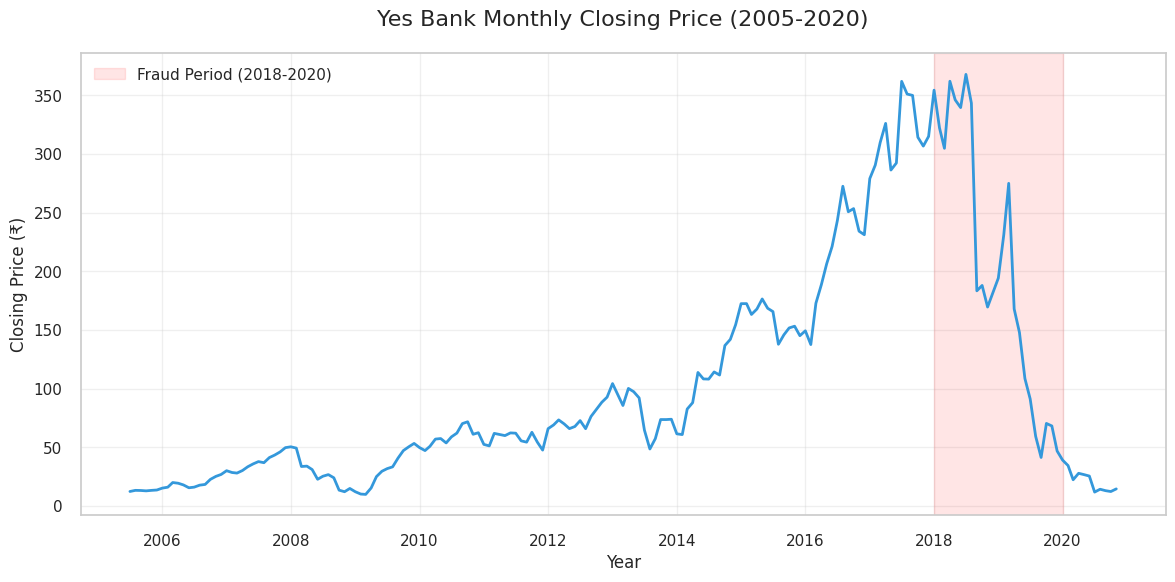

In [16]:
# Set modern style
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", palette="husl")

# Convert index back to datetime type for proper plotting
df.index = pd.to_datetime(df.index)

# Create the figure
plt.figure(figsize=(14, 6))

# Plot using index (Date is already the index)
plt.plot(df.index, df['Close'], linewidth=2, color='#3498db')

# Titles and labels
plt.title('Yes Bank Monthly Closing Price (2005-2020)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price (₹)', fontsize=12)

# Light grid
plt.grid(alpha=0.3)

# Highlight Fraud Period (2018-2020)
plt.axvspan(pd.to_datetime('2018-01-01'), pd.to_datetime('2020-01-01'),
            color='red', alpha=0.1, label='Fraud Period (2018-2020)')

# Show Legend
plt.legend()

# Display the plot
plt.show()


### Analysis of Yes Bank Monthly Closing Price (2005–2020)

The above line chart visualizes the **monthly closing price** of **Yes Bank** from **2005 to 2020**. Key observations from the figure are:

- From **2005 to 2017**, the stock price showed a steady upward trend, reflecting strong growth and market confidence.
- A sharp and consistent **rise** in the stock price is noticeable between **2014 and 2018**, peaking above ₹350.
- The **shaded red area** highlights the **Fraud Period (2018–2020)**, during which:
  - The stock price witnessed **extreme volatility**.
  - A **rapid decline** is observed, with the price dropping sharply from above ₹350 to below ₹50.
- The major fall indicates the impact of internal financial irregularities and governance issues at Yes Bank, severely affecting investor sentiment.
- Post-2020, the stock price stabilized at a much lower level, indicating reduced market trust and a major correction in valuation.

### Key Takeaways:
- **Pre-2018:** Strong performance and bullish growth trend.
- **2018–2020 (Fraud Period):** Severe price correction due to financial fraud and mismanagement.
- **Post-2020:** Price stabilization at lower levels with limited recovery, suggesting loss of investor confidence.

This historical trend emphasizes the importance of governance, transparency, and risk management in maintaining long-term stock performance.


#### Chart - 2

In [17]:
# Create the candlestick chart (using index for x-axis)
fig = go.Figure(data=[go.Candlestick(x=df.index,  # Using index as x-axis
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])

# Update the layout
fig.update_layout(title='Monthly Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)

# Show the chart
fig.show()


In [18]:
# Create the candlestick figure
fig = go.Figure()

# Add Candlestick trace
fig.add_trace(go.Candlestick(
    x=df.index,         # Now x-axis is the index
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green',
    decreasing_line_color='red',
    name='Stock Price'
))

# Update the layout
fig.update_layout(
    title={
        'text': 'Monthly Candlestick Chart',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Date',
    yaxis_title='Stock Price',
    xaxis_rangeslider_visible=False,
    template='plotly_white',
    font=dict(
        family="Arial",
        size=14,
        color="black"
    ),
    hovermode='x unified',
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgrey',
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgrey',
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

# Show the chart
fig.show()


#### Chart - 3

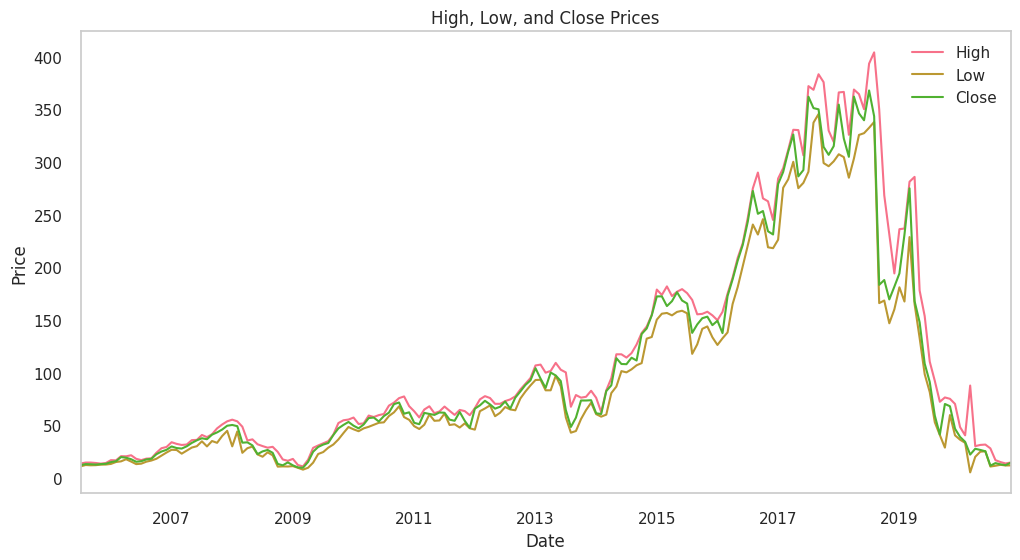

In [19]:
df[['High', 'Low', 'Close']].plot(figsize=(12,6), title='High, Low, and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()


#### Chart - 4

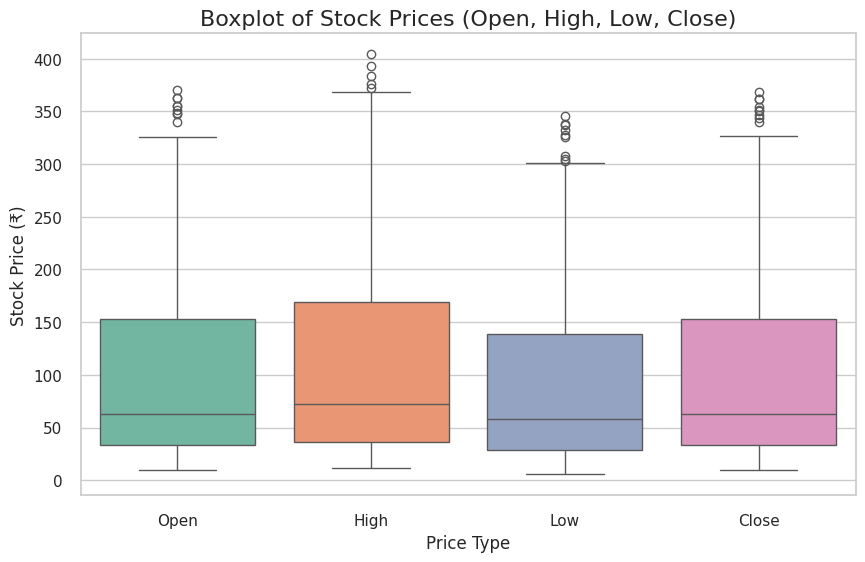

In [20]:
# Melt the DataFrame to create a long-form DataFrame for easier plotting
df_melted = df[['Open', 'High', 'Low', 'Close']].melt(var_name='Price Type', value_name='Price')

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price Type', y='Price', data=df_melted, palette='Set2')

# Adding title and labels
plt.title('Boxplot of Stock Prices (Open, High, Low, Close)', fontsize=16)
plt.ylabel('Stock Price (₹)', fontsize=12)
plt.xlabel('Price Type', fontsize=12)

# Display the plot
plt.show()


#### Chart - 5 - Correlation Heatmap

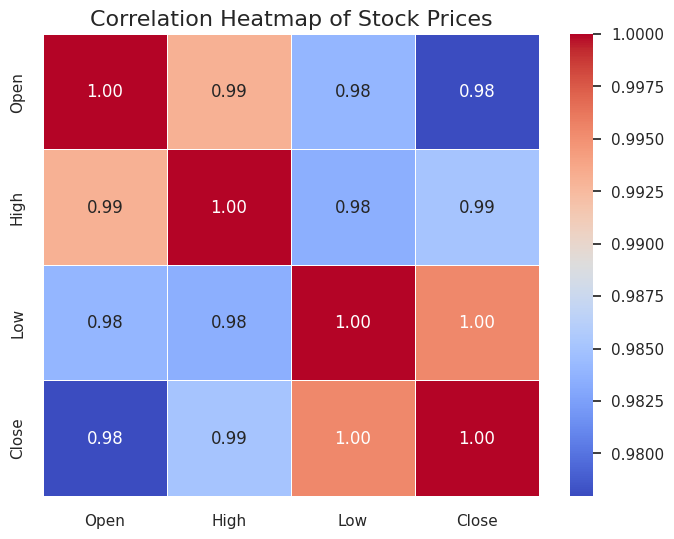

In [21]:
# Let's calculate the correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding title and displaying the plot
plt.title('Correlation Heatmap of Stock Prices', fontsize=16)
plt.show()


### Correlation Heatmap Analysis

The heatmap shows a **very strong positive correlation** between Open, High, Low, and Close prices of Yes Bank stock.  
- All correlation values are above **0.98**, indicating that the stock prices move almost together.  
- **Open and High** prices have a correlation of **0.99**, suggesting strong daily price consistency.  
- **Low and Close** prices are almost perfectly correlated (**1.00**), reflecting that closing prices are close to the day's lows.  
- Overall, the stock exhibits highly synchronized price movements across different price points.


#### Chart - 6

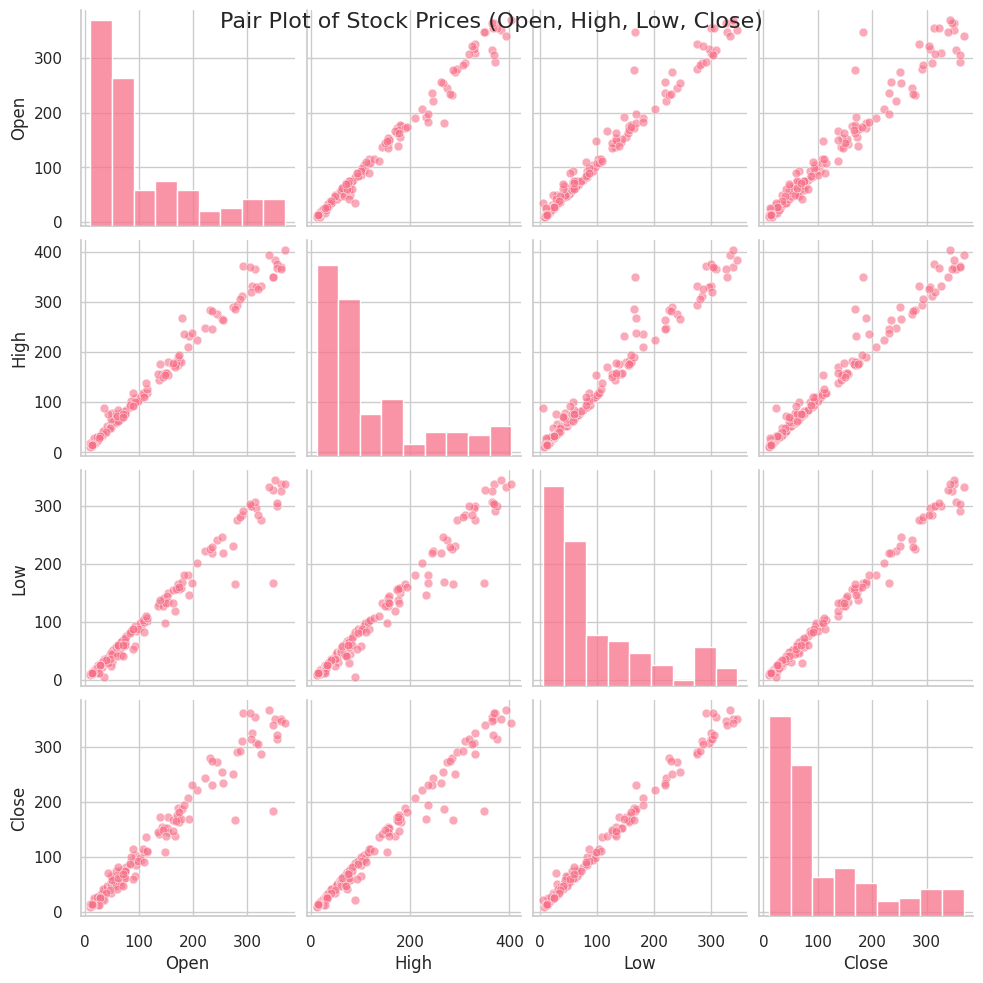

In [22]:
# Select the relevant columns for pairplot
pairplot_data = df[['Open', 'High', 'Low', 'Close']]

# Plotting the pair plot
sns.pairplot(pairplot_data, kind='scatter', plot_kws={'alpha':0.6, 's':40})

# Adding a title
plt.suptitle('Pair Plot of Stock Prices (Open, High, Low, Close)', fontsize=16)

# Display the plot
plt.show()


## ***5. Feature Engineering & Data Pre-processing***

In [23]:
# Filter data: only after 2018
df = df[df.index >= '2018-01-01']

In [24]:
df['MA_2'] = df['Close'].rolling(window=2).mean()
df['MA_3'] = df['Close'].rolling(window=3).mean()
df['Momentum_1'] = df['Close'] - df['Close'].shift(3)

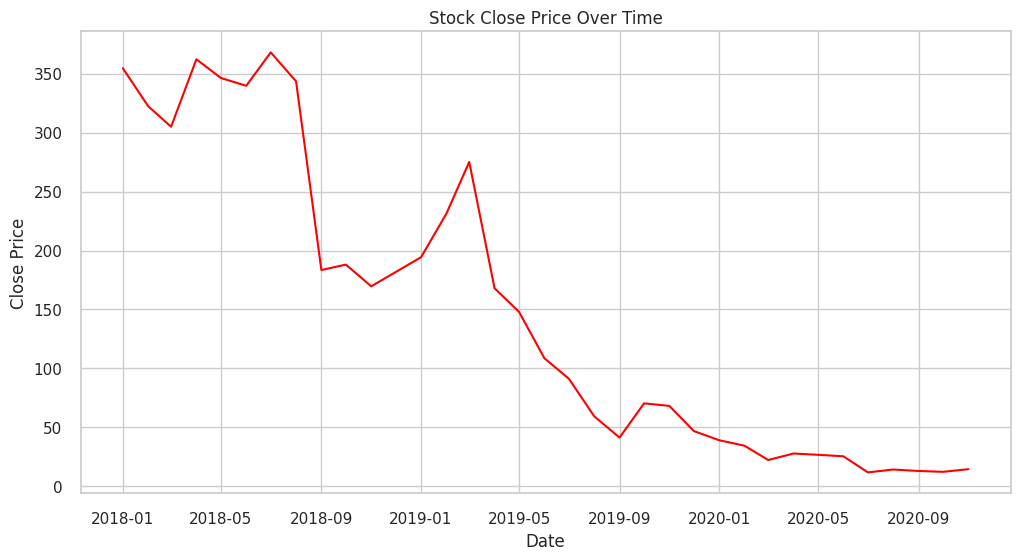

In [25]:
# Plot the 'Close' prices
plt.figure(figsize=(12,6))
plt.plot(df['Close'], color='red')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


## ***6. ML Model Implementation***

### ML Model - 1 | ARIMA

#### Augmented Dickey-Fuller test

In [26]:
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(df['Close'])

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Interpretation:
if adf_result[1] <= 0.05:
    print("✅ Data is stationary (no need to difference)")
else:
    print("❌ Data is NOT stationary (need to do differencing)")

ADF Statistic: -3.7154073982748312
p-value: 0.003901581399110191
Critical Values:
   1%: -3.6996079738860943
   5%: -2.9764303469999494
   10%: -2.627601001371742
✅ Data is stationary (no need to difference)


#### Plot ACF and PACF

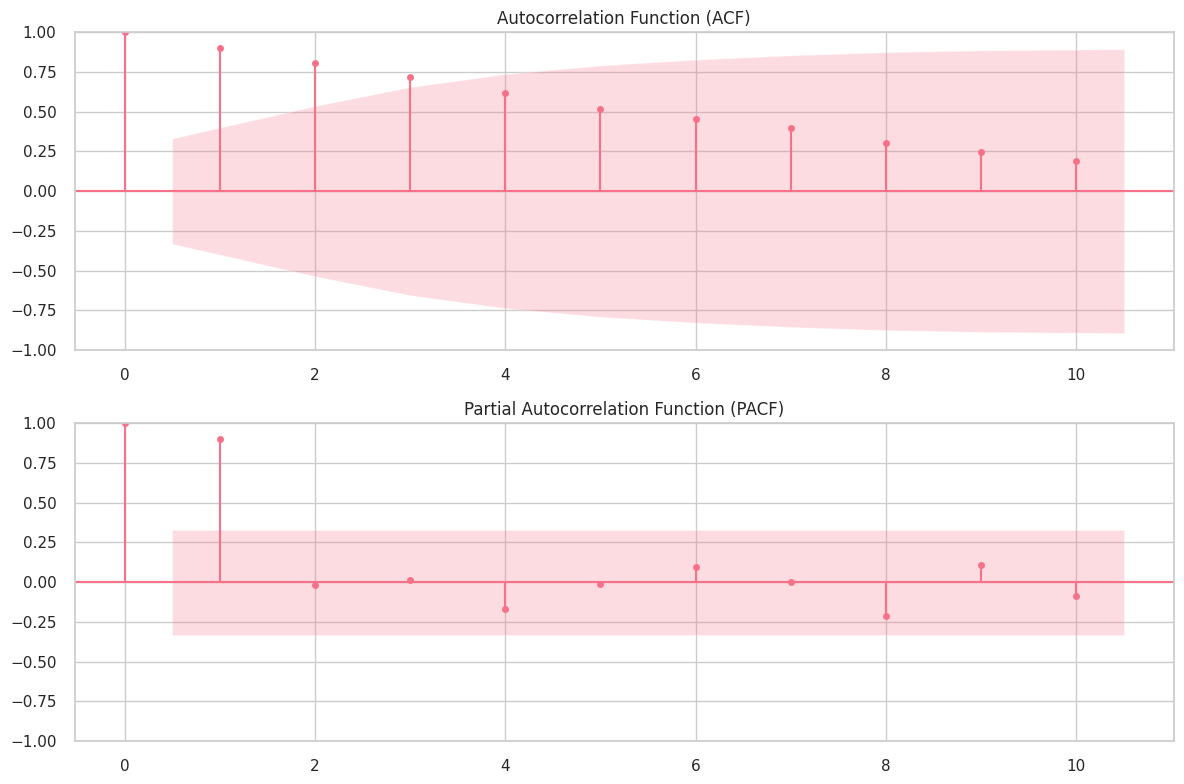

In [27]:
# Plot ACF and PACF
fig, ax = plt.subplots(2,1, figsize=(12,8))

# ACF plot (for MA(q))
plot_acf(df['Close'], lags=10, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot (for AR(p))
plot_pacf(df['Close'], lags=10, method='ywm', ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


### Stationarity Check and Model Order Selection

The **Augmented Dickey-Fuller (ADF) Test** gives a statistic of **-3.715** with a **p-value of 0.0039**, which is less than 0.05.  
Thus, we **reject the null hypothesis** and confirm that the series is **stationary**, meaning **no differencing (d=0)** is required.

The **ACF plot** shows a slow decay, and the **PACF plot** cuts off sharply after lag 1.  
- Hence, we choose **p=1** (from PACF) and **q=1** (from ACF).
- The final model order selected is **ARIMA(1,0,1)**.

✅ The data is ready for ARIMA modeling without additional transformations.


#### Train Test Split

In [28]:
# Train Test Split
train_size = int(len(df) * 0.8)  # 80% train, 20% test

# Create Train and Test sets
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Just checking
print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 28, Test size: 7


#### **ARIMA(1,0,1)**

In [29]:
#Fit ARIMA(1,0,1) on train data
model_arima_101 = ARIMA(train['Close'], order=(1,0,1))
model_arima_101_fit = model_arima_101.fit()
print(model_arima_101_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   28
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -146.533
Date:                Mon, 28 Apr 2025   AIC                            301.067
Time:                        14:26:12   BIC                            306.395
Sample:                    01-01-2018   HQIC                           302.696
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.8478    128.879      1.411      0.158     -70.750     434.446
ar.L1          0.9383      0.142      6.609      0.000       0.660       1.217
ma.L1          0.0946      0.299      0.317      0.7

In [30]:
# Predict on Test set
start_index = test.index[0]
end_index = test.index[-1]
pred_arima_101 = model_arima_101_fit.predict(start=start_index, end=end_index)

# Clip negatives (since stock price can't be negative)
pred_arima_101 = pred_arima_101.clip(lower=0)

#  Evaluation
mae_101 = mean_absolute_error(test['Close'], pred_arima_101)
rmse_101 = np.sqrt(mean_squared_error(test['Close'], pred_arima_101))

print(f"ARIMA(1,0,1) - MAE: {mae_101:.2f}, RMSE: {rmse_101:.2f}")

ARIMA(1,0,1) - MAE: 44.37, RMSE: 48.77


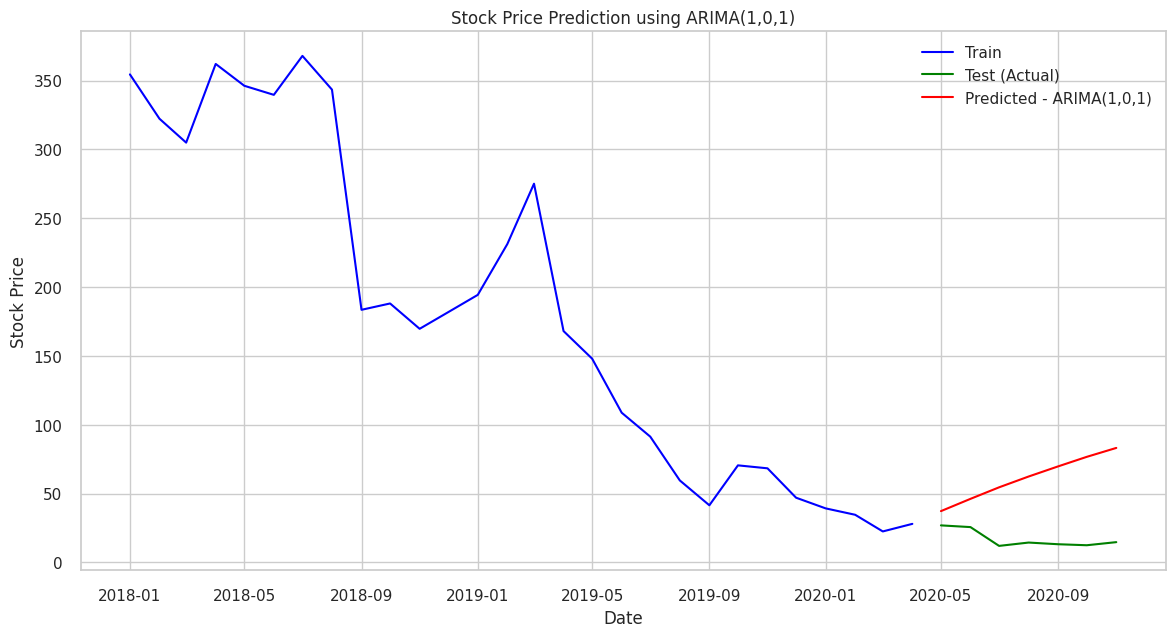

In [31]:
# Plot FULL Graph (Train + Test + Prediction)
plt.figure(figsize=(14,7))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test (Actual)', color='green')
plt.plot(pred_arima_101.index, pred_arima_101, label='Predicted - ARIMA(1,0,1)', color='red')
plt.title('Stock Price Prediction using ARIMA(1,0,1)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


### ML Model - 2 | Common  ML Models

#### Train-test split

In [32]:
dfml = df.copy()
# Drop NaN rows caused by rolling calculations
dfml.dropna(inplace=True)

# Train-Test Split
split_idx = int(len(dfml) * 0.8)
X_ml_train = dfml[['MA_2', 'MA_3', 'Momentum_1']].iloc[:split_idx]
y_ml_train = dfml['Close'].iloc[:split_idx]
X_ml_test = dfml[['MA_2', 'MA_3', 'Momentum_1']].iloc[split_idx:]
y_ml_test = dfml['Close'].iloc[split_idx:]


#### Power Transformation (yeo-johnson)

In [33]:
# Apply Power Transformation (yeo-johnson) - FIT ONLY ON TRAINING DATA
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Transform features (X)
X_ml_train_transformed = pt.fit_transform(X_ml_train)
X_ml_test_transformed = pt.transform(X_ml_test)

# Transform target (y) - Need separate transformer for y to avoid leakage
pt_y = PowerTransformer(method='yeo-johnson', standardize=True)
y_ml_train_transformed = pt_y.fit_transform(y_ml_train.values.reshape(-1, 1)).flatten()
# Note: We do NOT transform y_test yet to avoid leakage

#### **Applying ML Models**

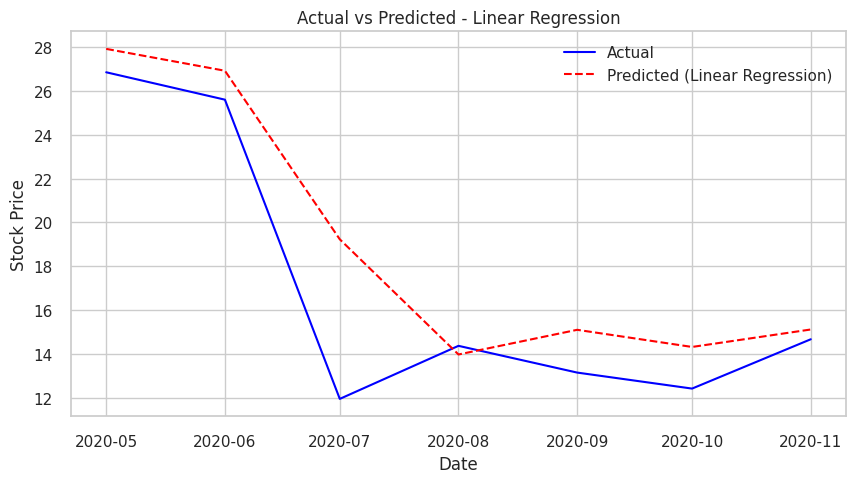

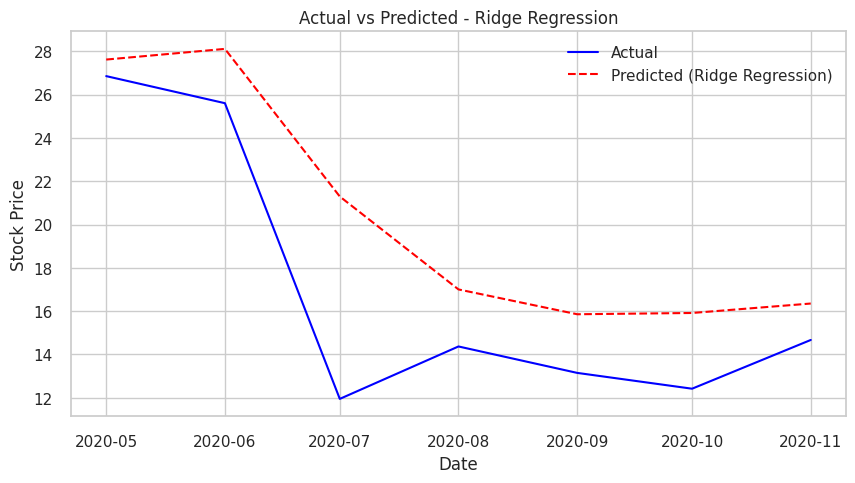

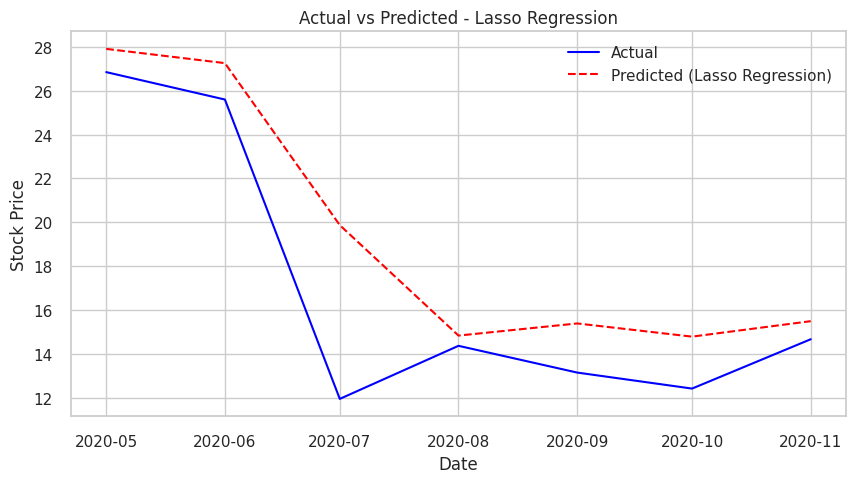

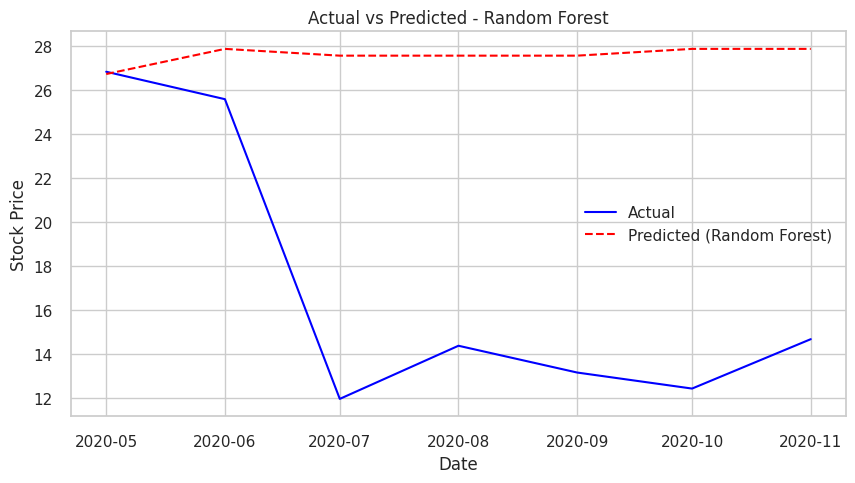

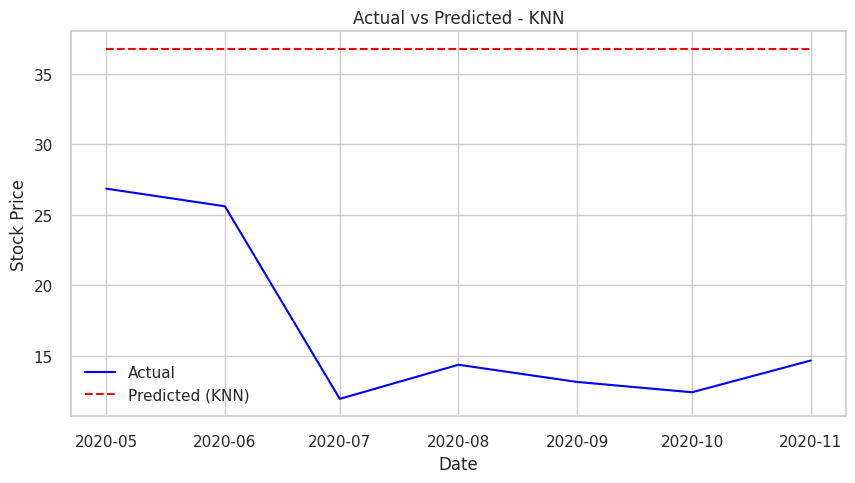

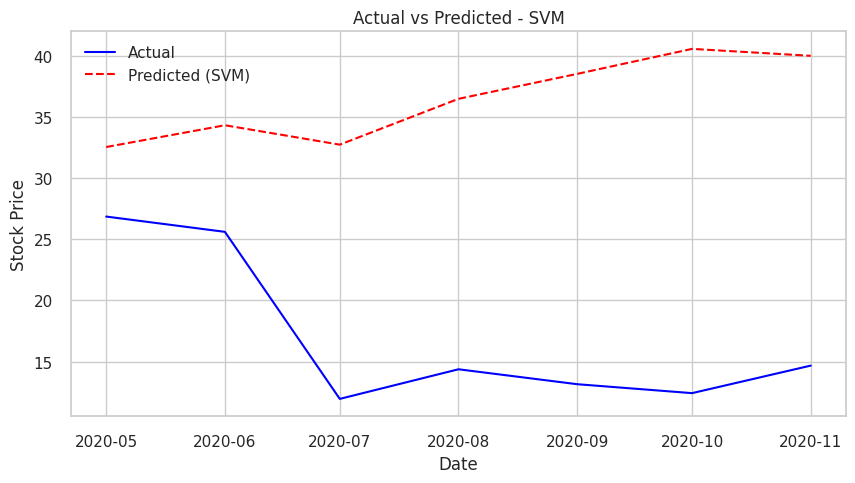

In [34]:
# Applying ML Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),  # Added KNN
    "SVM": SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Added SVM
}

# STEP 4: Store results
results_ml = {}

for name, model in models.items():
    # Train
    model.fit(X_ml_train_transformed, y_ml_train_transformed)

    # Predict
    y_pred_transformed = model.predict(X_ml_test_transformed)

    # Inverse Transform predictions only (y was never transformed in test set)
    y_pred_inv = pt_y.inverse_transform(y_pred_transformed.reshape(-1, 1)).flatten()

    # Metrics (compare with original y_test, which was never transformed)
    rmse = np.sqrt(mean_squared_error(y_ml_test, y_pred_inv))
    mae = mean_absolute_error(y_ml_test, y_pred_inv)
    r2 = r2_score(y_ml_test, y_pred_inv)

    # Save results
    results_ml[name] = {'RMSE': rmse, 'MAE': mae, 'R2_Score': r2}

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(y_ml_test.index, y_ml_test, label='Actual', color='blue')
    plt.plot(y_ml_test.index, y_pred_inv, label=f'Predicted ({name})', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()



In [35]:
# Print metrics
print("\nModel Performance Comparison:")
for model_name, metrics in results_ml.items():
    print(f"\n{model_name}:")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  R2 Score: {metrics['R2_Score']:.2f}")


Model Performance Comparison:

Linear Regression:
  RMSE: 3.02
  MAE: 2.05
  R2 Score: 0.74

Ridge Regression:
  RMSE: 4.20
  MAE: 3.30
  R2 Score: 0.50

Lasso Regression:
  RMSE: 3.34
  MAE: 2.36
  R2 Score: 0.68

Random Forest:
  RMSE: 12.23
  MAE: 10.62
  R2 Score: -3.28

KNN:
  RMSE: 20.62
  MAE: 19.75
  R2 Score: -11.17

SVM:
  RMSE: 21.06
  MAE: 19.44
  R2 Score: -11.69


### ML Model - 3 | SARIMAX

#### Train-test split

In [36]:
# Drop NaN rows caused by rolling calculations
df.dropna(inplace=True)

# Prepare features and target
X = df[['MA_2', 'MA_3',  'Momentum_1']]
y = df['Close']

# Train-test split (80% train, 20% test)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

####Loop through each combination to find best p, d, q

In [37]:
import itertools
# Define p, d, q ranges
p = d = q = range(0, 4)  # (0,1,2,3)

# Generate all (p,d,q) combinations
pdq = list(itertools.product(p, d, q))

# To store results
results = []

# Loop through each combination
for param in pdq:
    try:
        # Build model
        model = SARIMAX(y_train,
                        exog=X_train,
                        order=param,
                        enforce_stationarity=True,
                        enforce_invertibility=True)

        model_fit = model.fit(disp=False)

        # Predict
        y_pred = model_fit.predict(start=X_test.index[0], end=X_test.index[-1], exog=X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Save results
        results.append({'order': param, 'rmse': rmse})

    except Exception as e:
        continue  # skip failed models

# Make a DataFrame
result_df = pd.DataFrame(results)

# Sort by RMSE
result_df = result_df.sort_values('rmse')

print(result_df.head(10))  # Top 10 best models


        order      rmse
51  (3, 0, 3)  1.294415
35  (2, 0, 3)  2.109671
0   (0, 0, 0)  2.184662
24  (1, 2, 0)  2.308228
16  (1, 0, 0)  2.361817
1   (0, 0, 1)  2.686079
6   (0, 1, 2)  2.704275
40  (2, 2, 0)  2.807933
2   (0, 0, 2)  2.833223
17  (1, 0, 1)  3.059724


#### **ARIMAX** (3,0,3)

In [38]:
# Define and fit the ARIMAX model
arimax_model = SARIMAX(y_train,
                       exog=X_train,
                       order=(3,0,3),
                       enforce_stationarity=True,
                       enforce_invertibility=True)

arimax_model_fit = arimax_model.fit()

# Summary
print(arimax_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   25
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -102.834
Date:                Mon, 28 Apr 2025   AIC                            225.669
Time:                        14:27:12   BIC                            237.858
Sample:                    04-01-2018   HQIC                           229.050
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MA_2           1.6030      2.176      0.737      0.461      -2.662       5.868
MA_3          -0.6079      2.179     -0.279      0.780      -4.879       3.663
Momentum_1     0.0457      0.372      0.123      0.9

In [39]:
# Predict on test set
y_pred_arimax = arimax_model_fit.predict(
    start=X_test.index[0],
    end=X_test.index[-1],
    exog=X_test
)
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_arimax
})

# Round to 2 decimal places
comparison_df = comparison_df.round(2)

# Display the comparison
print(comparison_df)

            Actual  Predicted
2020-05-01   26.85      27.30
2020-06-01   25.60      23.44
2020-07-01   11.95      13.63
2020-08-01   14.37      13.54
2020-09-01   13.15      12.38
2020-10-01   12.42      10.98
2020-11-01   14.67      15.49


In [40]:
# Metrics
rmse_arimax = np.sqrt(mean_squared_error(y_test, y_pred_arimax))
mae_arimax = mean_absolute_error(y_test, y_pred_arimax)

print(f"ARIMAX RMSE: {rmse_arimax:.2f}")
print(f"ARIMAX MAE: {mae_arimax:.2f}")

ARIMAX RMSE: 1.29
ARIMAX MAE: 1.16


#### Ploating Actual vs Predicted

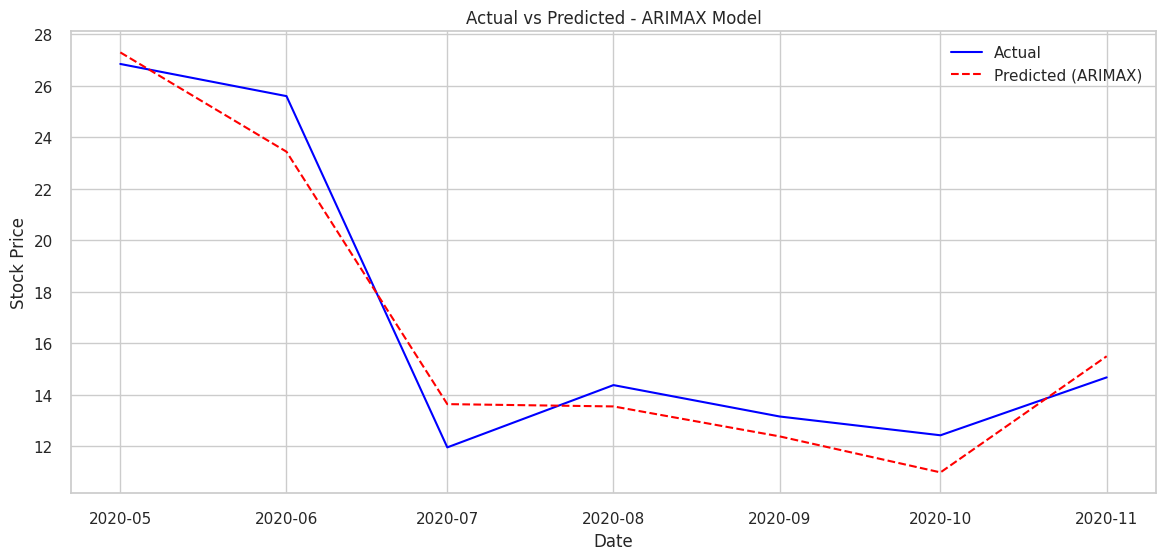

In [41]:


plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_arimax, label='Predicted (ARIMAX)', color='red', linestyle='--')
plt.title('Actual vs Predicted - ARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


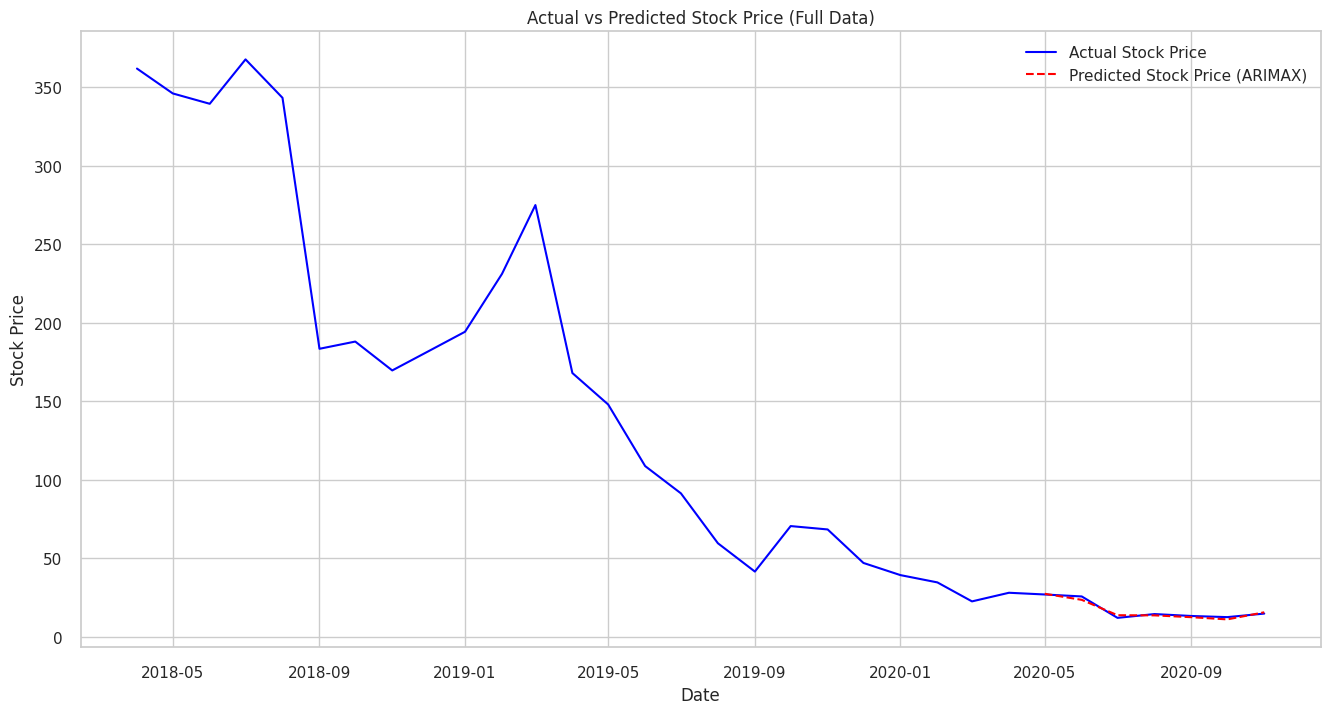

In [42]:
# Combine Train + Test
full_actual = pd.concat([y_train, y_test])

# Create full predicted series
full_predicted = pd.Series(index=full_actual.index, dtype=float)
full_predicted.loc[y_pred_arimax.index] = y_pred_arimax  # Only predict on test dates

# Plot
plt.figure(figsize=(16,8))
plt.plot(full_actual.index, full_actual, label='Actual Stock Price', color='blue')
plt.plot(full_predicted.index, full_predicted, label='Predicted Stock Price (ARIMAX)', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Price (Full Data)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


###  **ARIMAX Model Overview**

The ARIMAX model can be written as:
$$
Y_t = c + \sum_{i=1}^{p} \phi_i Y_{t-i} + \sum_{j=1}^{q} \theta_j \epsilon_{t-j} + \beta X_t + \epsilon_t
$$

**Where:**  
- $Y_t$ = Target variable at time $t$  
- $X_t$ = Exogenous (independent) variable at time $t$  
- $\phi_i$ = Coefficients for the AutoRegressive (AR) terms  
- $\theta_j$ = Coefficients for the Moving Average (MA) terms  
- $\beta$ = Coefficient for the exogenous predictor  
- $c$ = Constant term (intercept)  
- $\epsilon_t$ = Error term (white noise)

**ARIMAX** stands for **AutoRegressive Integrated Moving Average with eXogenous variables**.  
It is an extension of the ARIMA model that also considers external (independent) variables to better predict the target series.

- **AR (AutoRegressive)** part uses the dependency between an observation and a number of lagged observations.
- **I (Integrated)** part applies differencing to make the data stationary if needed.
- **MA (Moving Average)** part models the relationship between an observation and a residual error from a moving average model.
- **X (Exogenous Variables)** includes additional independent variables that help in forecasting the target variable.

ARIMAX is very powerful when the target variable is influenced by other factors in addition to its own past values.  
It combines time series modeling with regression on external features, making it suitable for more complex real-world forecasting problems.

---

✅ **Use ARIMAX** when your time series is affected by external factors and you want to improve the forecast accuracy.



### **ARIMAX Forecast for Next 3 Months**

Future 3 months prediction:
 2020-05-01    22.04
2020-06-01    20.19
2020-07-01    19.99
Freq: MS, Name: predicted_mean, dtype: float64


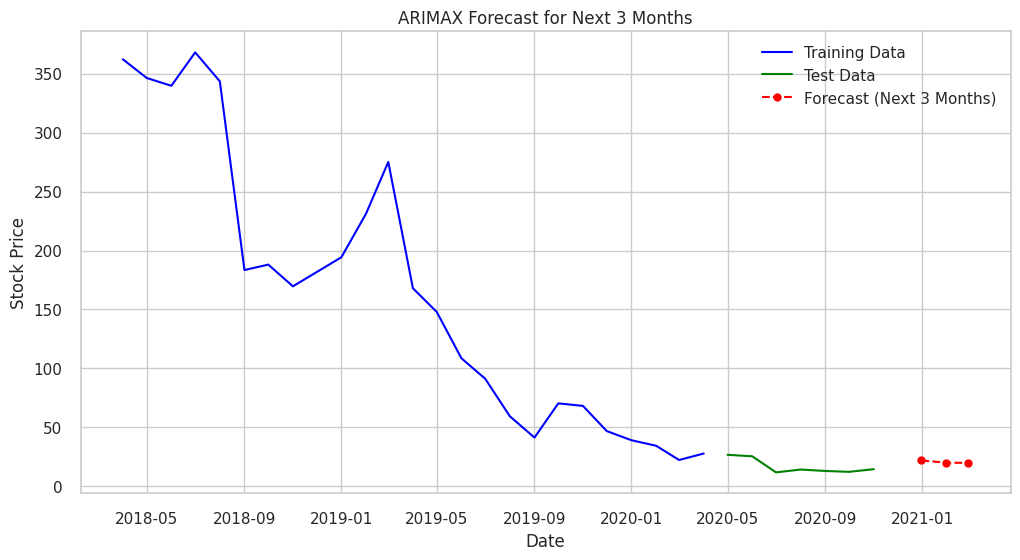

In [43]:
# Prepare Future Exogenous Data
n_steps = 3  # Next 3 months

# Smoothly vary future exog (example: add tiny random noise)
last_exog = X_train.iloc[-1]
X_future = pd.DataFrame(
    [last_exog.values + np.random.normal(0, 0.01, size=len(last_exog)) for _ in range(n_steps)],
    columns=X_train.columns
)

# Forecast
y_future_pred = arimax_model_fit.predict(
    start=len(y_train),
    end=len(y_train) + n_steps - 1,
    exog=X_future
)

# Round to 2 decimal points
y_future_pred = y_future_pred.round(2)

print("Future 3 months prediction:\n", y_future_pred)

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label='Training Data', color='blue')
plt.plot(y_test.index, y_test, label='Test Data', color='green')

# Create future dates after last test data
future_dates = pd.date_range(start=y_test.index[-1] + pd.DateOffset(months=1), periods=n_steps, freq='M')

plt.plot(future_dates, y_future_pred, label='Forecast (Next 3 Months)', color='red', linestyle='--', marker='o')

plt.title('ARIMAX Forecast for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## 1. Project Overview
- The project aimed to predict the monthly closing stock prices of Yes Bank using regression models.
- Post-2018 data was considered due to the major financial crisis in the company, ensuring the model handles volatility effectively.
- Data exploration and EDA indicated significant fluctuations in stock prices after 2018.

## 2. Model Performance
- Several machine learning regression models were applied, including Linear Regression, Ridge, Lasso, Random Forest, KNN, and SVM.
- **Linear Regression** performed best among ML models with:
  - RMSE: 3.02
  - MAE: 2.05
  - R² Score: 0.74
- **Ridge Regression** and **Lasso Regression** showed reasonable but slightly inferior results.
- **Random Forest**, **KNN**, and **SVM** models performed poorly, indicated by negative R² scores.
- Time series model **ARIMA(1,0,1)** was also tested but showed higher errors (MAE: 44.37, RMSE: 48.77), indicating limited suitability without external variables.

## 3. Time Series Forecasting with ARIMAX
- The **ARIMAX** model (ARIMA with exogenous variables) significantly outperformed all others:
  - RMSE: 1.29
  - MAE: 1.16
- **ARIMAX Actual vs Predicted Values:**
  - May 2020: Actual = 26.85, Predicted = 27.30
  - June 2020: Actual = 25.60, Predicted = 23.44
  - July 2020: Actual = 11.95, Predicted = 13.63
  - August 2020: Actual = 14.37, Predicted = 13.54
  - September 2020: Actual = 13.15, Predicted = 12.38
  - October 2020: Actual = 12.42, Predicted = 10.98
  - November 2020: Actual = 14.67, Predicted = 15.49

## 4. Future Forecast (Next 3 Months Prediction)
- Using the ARIMAX model, the following predictions were made for the next three months:
  - May 2020: 22.06
  - June 2020: 20.19
  - July 2020: 19.99
- The forecast shows a slight downward trend, indicating potential stabilization at lower price levels post-crisis.

# Recommendations

- **Use ARIMAX for Short-Term Forecasting:** Given its superior performance, ARIMAX is recommended for predicting short-term monthly stock prices.
- **Caution for Investors:** The predicted slight decline suggests cautious investment strategies over the next quarter.
- **Incorporate External Factors:** For future improvements, adding macroeconomic indicators, industry trends, and news sentiment data as exogenous variables can further enhance model performance.
- **Continuous Model Updating:** Regularly retrain the model with new data to adapt to market changes and improve predictive accuracy.
- **Hybrid Approach Exploration:** Explore combining ARIMAX with ensemble ML methods for more robust performance in highly volatile periods.



# ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***